In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering
EastWestAirlines = pd.read_excel("C:/Users/manth/Assignment/Clustering/EastWestAirlines.xlsx")
EastWestAirlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [2]:
def norm_func(i):
    x=(i-i.min())/(i.max() - i.min())
    return(x)

df_norm = norm_func(EastWestAirlines.iloc[:,1:])
df_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


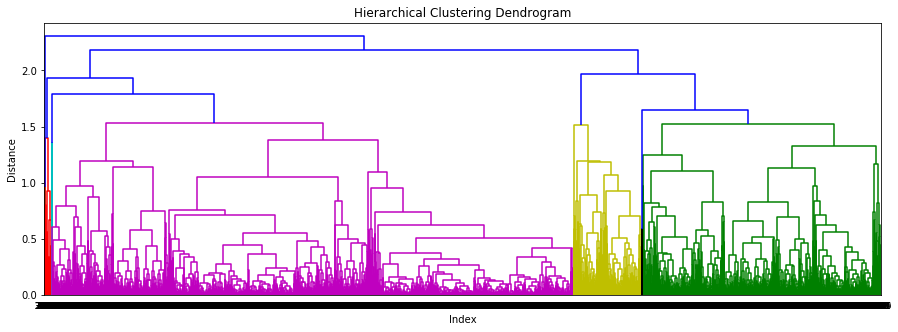

In [4]:
#Create Dendogram

link = linkage(df_norm, method="complete", metric="euclidean")

plt.figure(figsize=(15,5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(link,leaf_rotation=0,leaf_font_size=8)
plt.show()

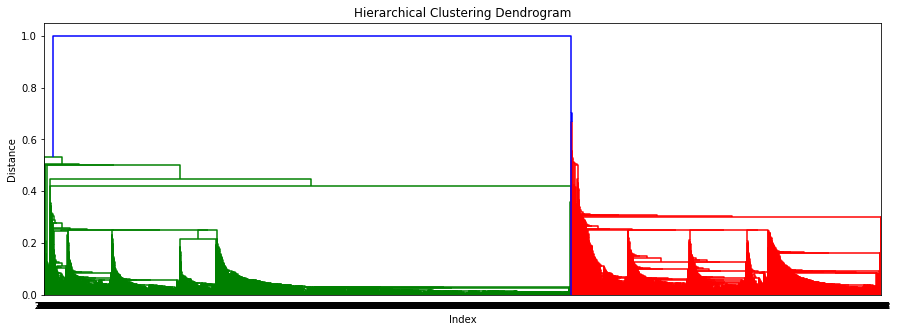

In [5]:
#Create Dendogram

link = linkage(df_norm, method="single", metric="euclidean")

plt.figure(figsize=(15,5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(link,leaf_rotation=0,leaf_font_size=8)
plt.show()

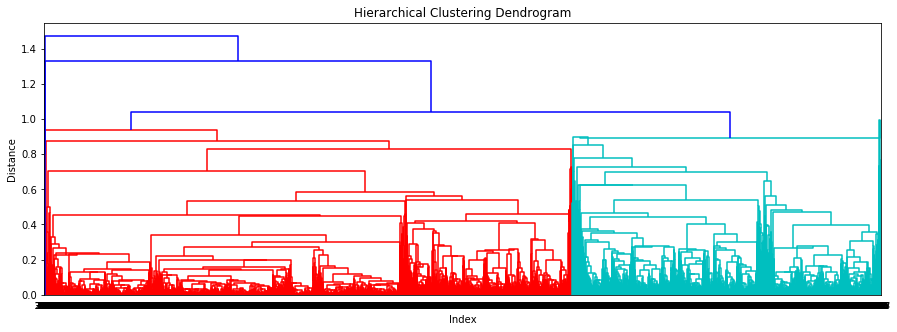

In [6]:
#Create Dendogram

link = linkage(df_norm, method="centroid", metric="euclidean")

plt.figure(figsize=(15,5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(link,leaf_rotation=0,leaf_font_size=8)
plt.show()

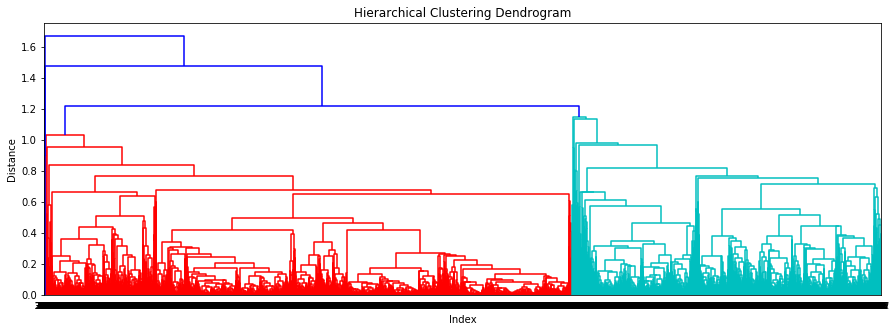

In [7]:
#Create Dendogram

link = linkage(df_norm, method="average", metric="euclidean")

plt.figure(figsize=(15,5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(link,leaf_rotation=0,leaf_font_size=8)
plt.show()

In [8]:
# Apply Hierarchical Clustering
hier_cluster= AgglomerativeClustering(n_clusters=6, linkage='complete',affinity = "euclidean").fit(df_norm)
cluster_label= pd.Series(hier_cluster.labels_)

EastWestAirlines["Cluster"] = cluster_label
EastWestAirlines = EastWestAirlines.iloc[:,[12,0,1,2,3,4,5,6,7,8,9,10,11]]

EastWestAirlines.sort_values(by=['Cluster'], inplace=True)
EastWestAirlines.head()

,Cluster,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
1262,0,1275,11494,0,1,1,1,8425,15,4700,11,5487,1
3162,0,3184,103203,0,1,1,1,3200,4,200,2,1556,1
1483,0,1498,49991,0,4,1,1,44146,27,2510,4,4803,1
3165,0,3187,194816,0,1,1,1,20822,25,6647,12,2424,1
3167,0,3189,17863,0,1,1,1,0,0,0,0,2028,1


In [9]:
EastWestAirlines.to_csv("EastWestAirlines_h.csv",encoding="utf-8")